In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read in data

df = pd.read_csv('dataframe_geo_30m.csv')

# Remove outliers
df = df[(df['snow'] > 0) & (df['snow'] < 5) ]

# Define aspects (N,E,S,W)
aspects = [
    ((df['asp'] >= 315) | (df['asp'] < 45)),
    ((df['asp'] >= 45) & (df['asp'] < 135)),
    ((df['asp'] >= 135) & (df['asp'] < 225)),
    ((df['asp'] >= 225) & (df['asp'] < 315))
]

nesw = [0, 1, 2, 3]


# Use np select to apply conditions and values
df['aspects'] = np.select(aspects, nesw)

#Define elevation classes
elevations = [(df['elev'] < 1800),
              ((df['elev'] >= 1800) & (df['elev'] < 2100)),
                (df['elev'] >= 2100)]

elevation_class = ['Low [<1800]', 'Mid [1800-2100]', 'High >2100']

# Use np select to apply conditions and values
df['elevation_class'] = np.select(elevations, elevation_class)

df

,snow,elev,asp,dnbr,xcoord,ycoord,aspects,elevation_class
0,1.709473,2117.374512,32.438465,411,606343,4870857.5,0,High >2100
1,1.827637,2112.877441,33.135609,411,606373,4870857.5,0,High >2100
2,1.798584,2107.450928,93.413132,201,606403,4870857.5,1,High >2100
3,1.525391,2102.551270,0.002197,102,606433,4870857.5,0,High >2100
4,1.875977,2127.436279,22.817955,289,606313,4870827.5,0,High >2100
...,...,...,...,...,...,...,...,...
38492,0.379883,1666.457031,190.574860,-89,605023,4862517.5,2,Low [<1800]
38493,0.109375,1673.962402,213.654862,-74,605053,4862517.5,2,Low [<1800]
38495,0.335449,1670.508545,106.156975,-275,605113,4862517.5,1,Low [<1800]
38496,1.024292,1653.199341,135.028671,-131,605143,4862517.5,2,Low [<1800]


In [3]:
#check the min and max values
print(df['snow'].min())
print(df['snow'].max())
print(df['elev'].min())
print(df['elev'].max())

0.00036621
4.45800781
1578.338257
2478.422607


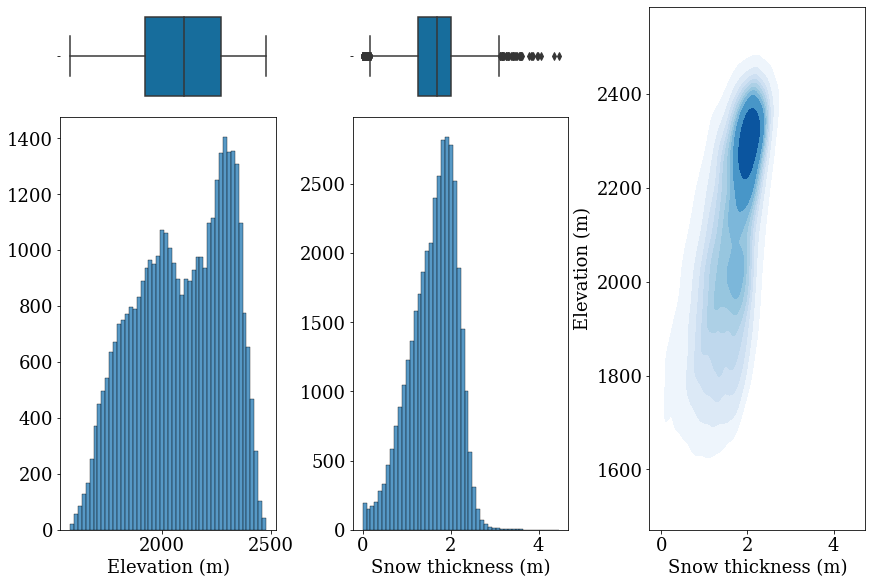

In [4]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gspec = fig.add_gridspec(ncols=3, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[1:6, 0])
ax3 = fig.add_subplot(gspec[1:6, 1])
ax4 = fig.add_subplot(gspec[0:6, 2])

#plot the histogram and boxplot of snow thickness and elevation
sns.boxplot(x= df['snow'], ax=ax1, palette= 'colorblind')
sns.boxplot(x= df['elev'], ax=ax0, palette= 'colorblind')
sns.histplot(data = df, x ='snow', ax=ax3, bins=50)
sns.histplot(data = df, x ='elev', ax=ax2, bins=50)
sns.kdeplot(data = df, x = 'snow', y = 'elev', shade=True, ax=ax4, cmap='Blues')

#set x-axis labels
ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('Elevation (m)')
ax3.set_xlabel('Snow thickness (m)')
ax4.set_xlabel('Snow thickness (m)')

#set y-axis labels
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('Elevation (m)')

#remove tick of the firstand second  axes
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)




#remove all spines on first axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

#remove all spines on second axes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

/tmp/ipykernel_217367/102710114.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['0', '0.45', '0.9', '1.35', '1.8', '2.25'])
/tmp/ipykernel_217367/102710114.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0', '0.18', '0.36', '0.54', '0.72', '0.9', '1.08', '1.26'], horizontalalignment='right')


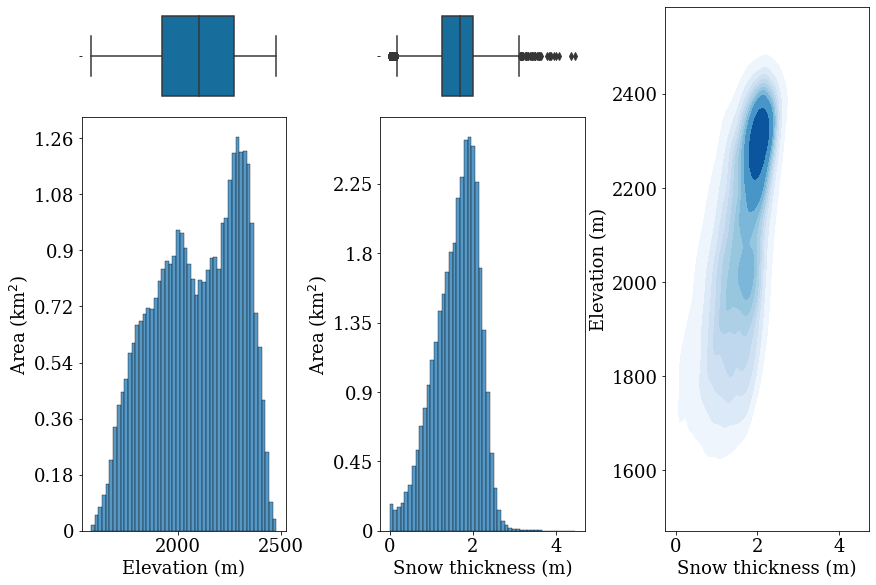

In [8]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gspec = fig.add_gridspec(ncols=3, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[1:6, 0])
ax3 = fig.add_subplot(gspec[1:6, 1])
ax4 = fig.add_subplot(gspec[0:6, 2])

#plot the histogram and boxplot of snow thickness and elevation
sns.boxplot(x= df['snow'], ax=ax1, palette= 'colorblind')
sns.boxplot(x= df['elev'], ax=ax0, palette= 'colorblind')
sns.histplot(data = df, x ='snow', ax=ax3, bins=50)
sns.histplot(data = df, x ='elev', ax=ax2, bins=50)
sns.kdeplot(data = df, x = 'snow', y = 'elev', shade=True, ax=ax4, cmap='Blues')

#set x-axis labels
ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('Elevation (m)')
ax3.set_xlabel('Snow thickness (m)')
ax4.set_xlabel('Snow thickness (m)')

#set y-axis labels
ax2.set_ylabel('Area (km$^2$)')
ax3.set_ylabel('Area (km$^2$)')
ax4.set_ylabel('Elevation (m)')

#remove tick of the firstand second  axes
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


#remove all spines on first axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

#remove all spines on second axes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

#set the y tick labels of ax2
ax3.set_yticklabels(['0', '0.45', '0.9', '1.35', '1.8', '2.25'])
ax2.set_yticklabels(['0', '0.18', '0.36', '0.54', '0.72', '0.9', '1.08', '1.26'], horizontalalignment='right')

#save figure
fig.savefig('snow_elev_hist2.jpeg', dpi=600)


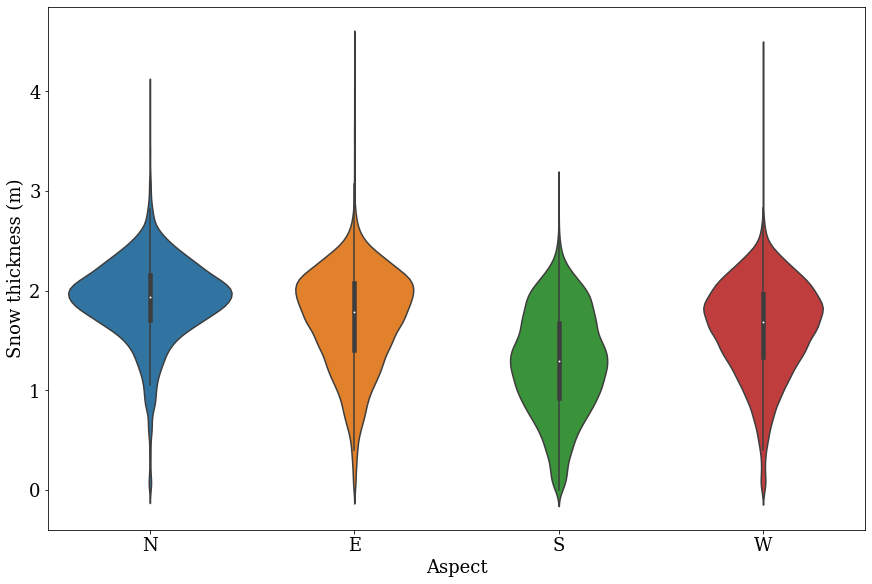

In [102]:
#create figure object, axes and subplots
fig, ax = plt.subplots( figsize = (12, 8), constrained_layout=True) 

sns.violinplot(x= df['aspects'], y = df['snow'])

#label the x axes
plt.xlabel('Aspect')
plt.ylabel('Snow thickness (m)')

#x axis tick labels
plt.xticks([0,1,2,3], ['N', 'E', 'S', 'W'])


plt.show()

In [130]:
df

,snow,elev,asp,dnbr,xcoord,ycoord,aspects,elevation_class
0,1.709473,2117.374512,32.438465,411,606343,4870857.5,0,mid
1,1.827637,2112.877441,33.135609,411,606373,4870857.5,0,mid
2,1.798584,2107.450928,93.413132,201,606403,4870857.5,1,mid
3,1.525391,2102.551270,0.002197,102,606433,4870857.5,0,mid
4,1.875977,2127.436279,22.817955,289,606313,4870827.5,0,mid
...,...,...,...,...,...,...,...,...
38492,0.379883,1666.457031,190.574860,-89,605023,4862517.5,2,low
38493,0.109375,1673.962402,213.654862,-74,605053,4862517.5,2,low
38495,0.335449,1670.508545,106.156975,-275,605113,4862517.5,1,low
38496,1.024292,1653.199341,135.028671,-131,605143,4862517.5,2,low


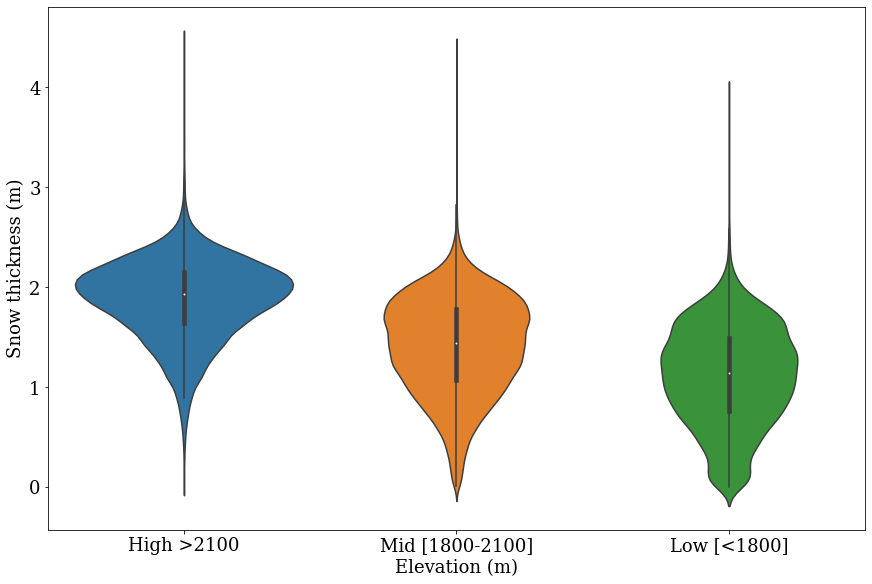

In [140]:
#create figure object, axes and subplots
fig, ax = plt.subplots( figsize = (12, 8), constrained_layout=True) 

sns.violinplot(x= df['elevation_class'], y = df['snow'])

#label the x axes
plt.xlabel('Elevation (m)')
plt.ylabel('Snow thickness (m)')

#x axis tick labels

plt.show()